# Create Tic Tac Toe game step by step
### This is a milestone project from The Complete Python Bootcamp From Zero to Hero in Python By Jose Portilla
Create a Tic Tac Toe game. You can use any IDE you are comfortable with.

Requirements:

* 2 players should be able to play the game (both sitting at the same computer)
* The board should be printed out every time a player makes a move
* You should be able to accept input of the player position and then place a symbol on the board


# Step by step. 
1. Create the board for the game. the tic tac toe board is 3x3  
2. Write a function to take player 1 and 2 input of 'X' or 'O'  
3. Write a function that takes in the board list object, a marker ('X' or 'O'), and a desired position (number 1-9) and assigns it to the board  
4. Write a function that takes in a board and a mark (X or O) and then checks to see if that mark has won  
5. Write a function that uses the random module to randomly decide which player goes first. You may want to lookup random.randint() Return a string of which player went first  
6. Write a function that returns a boolean indicating whether a space on the board is freely available  
7. Write a function that checks if the board is full and returns a boolean value. True if full, False otherwise
8. Write a function that asks for a player's next position (as a number 1-9) and then uses the function from step 6 to check if it's a free position. If it is, then return the position for later use.  
9. Write a function that asks the player if they want to play again and returns a boolean True if they do want to play again  
10. Use while loops and the functions you've made to run the game!

**1. Create the board for the games**

In [67]:
from IPython.display import clear_output #useful in creating an interactive notebook

**Note**: clear_output only work for jupyter Notebook Environment, If you use different environment you need to find an alternative.

In [68]:
import matplotlib.pyplot as plt
import numpy as np

def display_board(board):
    
    clear_output() 
    
    fig, ax = plt.subplots(figsize=(3, 3))
    ax.set_xlim(0, 3)
    ax.set_ylim(0, 3)
    
    # Draw the grid lines
    for x in range(1, 3):
        ax.axhline(y=x, color='black', linewidth=2)
        ax.axvline(x=x, color='black', linewidth=2)

    # Annotate the board with Xs and Os
    for i in range(1, 10):
        row, col = divmod(i-1, 3)
        ax.text(col + 0.5, 3 - (row + 0.5), board[i], fontsize=24, ha='center', va='center')

    plt.axis('off')
    plt.show()

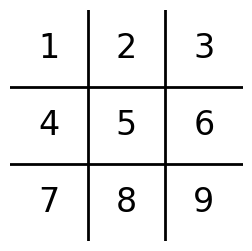

In [69]:
#Test the display_board function
test_board = ['#','1','2','3','4','5','6','7','8','9']
#"#" as place holder of 0 index
display_board(test_board)

**2. Write a function to take player 1 and 2 input of X or O**

In [70]:
#Solution
def player_input():
    '''
    OUTPUT = (Player_1_marker, Player_2_marker)
    '''
    
    marker = ''
    #while not (marker == 'X' or marker == 'O'):
    while marker != 'X' and marker != 'O':
        marker = input('Player1: Choose X or O: ').upper()
        
        if marker == 'X':
            
            return ('X','O')
        else:
        
            return ('O','X')

In [41]:
player_input()

Player1: Choose X or O: X


('X', 'O')

In [42]:
#Tuple unpacking
player1_marker, player2_marker = player_input()

Player1: Choose X or O: X


In [45]:
player1_marker

'X'

In [44]:
player2_marker

'O'

**Now we have the board and player input of player1 and player2**

**3: Write a function that takes in the board list object, a marker ('X' or 'O'), and a desired position (number 1-9) and assigns it to the board.**

In [71]:
#solution
def place_marker(board, marker, position):   
    
    board[position] = marker

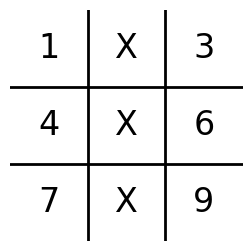

In [72]:
place_marker(test_board,'X',8)
place_marker(test_board,'X',5)
place_marker(test_board,'X',2)
display_board(test_board)

**4: Write a function that takes in a board and a mark (X or O) and then checks to see if that mark has won.**

In [73]:
def win_check(board, mark):
    # Define the winning combinations
    win_combinations = [
        [1, 2, 3],  # Rows
        [4, 5, 6],
        [7, 8, 9],
        [1, 4, 7],  # Columns
        [2, 5, 8],
        [3, 6, 9],
        [1, 5, 9],  # Diagonals
        [3, 5, 7]
    ]

    # Check each winning combination
    for combination in win_combinations:
        if all(board[pos] == mark for pos in combination):
            return True

    return False

In [50]:
# Version before
#def win_check(board, mark):
    
#     # Win TIC TAC TOE?
    
#     #All rows, and check to see if they all share the same marker
#     return ((board[1] == mark and board[2] == mark and board[3] == mark) or
#     (board[4] == board[5] == board[6] == mark) or
#     (board[7] == board[8] == board[9] == mark) or
#     #All columns
#     (board[7] == board[4] == board[1] == mark) or
#     (board[8] == board[5] == board[2] == mark) or
#     (board[9] == board[6] == board[3] == mark) or
#     # 2diagonal to check, check to see match
#     (board[1] == board[5] == board[9] == mark) or
#     (board[3] == board[5] == board[7] == mark))

In [49]:
win_check(test_board,'X')

True

**5: Write a function that uses the random module to randomly decide which player goes first. You may want to lookup random.randint() Return a string of which player went first.**

In [74]:
import random

def choose_first():
    flip = random.randint(0,1) #coin flip
    
    if flip == 0:
        return 'Player 1'
    else:
        return 'Player 2'

In [75]:
choose_first()

'Player 2'

**6: Write a function that returns a boolean indicating whether a space on the board is freely available.**

In [76]:
def space_check(board, position):
    
    #using isspace() to return True if there is an empty space in list
    if board[position].isspace():
        return True
    else:
        return False

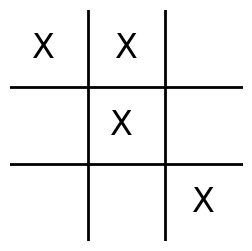

In [83]:
test_board =  ['#','X ','X',' ',' ','X ',' ',' ',' ','X']
display_board(test_board)

In [81]:
space_check(test_board, 1)

False

In [79]:
space_check(test_board, 9)

False

In [85]:
space_check(test_board, 4)

True

**7: Write a function that checks if the board is full and returns a boolean value. True if full, False otherwise.**

In [86]:
def full_board_check(board):
    
    for i in range(1,10):
        if space_check(board, i):
            return False
        
    #board is full if we return True
    return True

In [87]:
full_board_check(test_board)

False

**8: Write a function that asks for a player's next position (as a number 1-9) and then uses the function from step 6 to check if it's a free position. If it is, then return the position for later use.**

In [88]:
def player_choice(board):
    
    position = 0
    
    while position not in [1,2,3,4,5,6,7,8,9] or not space_check(board, position):
        position = int(input("Enter a position of number 1-9: "))
    
    return position

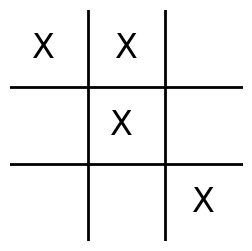

In [90]:
display_board(test_board)

In [89]:
player_choice(test_board)

Enter a position of number 1-9: 0
Enter a position of number 1-9: 1
Enter a position of number 1-9: 1
Enter a position of number 1-9: 4


4

In [91]:
player_choice(test_board)

Enter a position of number 1-9: 7


7

**9: Write a function that asks the player if they want to play again and returns a boolean True if they do want to play again.**

In [92]:
def replay():
    
    choice = 'Wrong'
    
    while choice not in ['Y','N']:
        choice = input('Play again? (Y or N): ').upper()
        
        if choice not in ['Y','N']:
            print('Sorry, I dont understand, please choose Y or N: ')
        
    if choice == 'Y':
        return True
    else:
        return False

In [94]:
replay()

Play again? (Y or N): M
Sorry, I dont understand, please choose Y or N: 
Play again? (Y or N): Y


True

In [96]:
# #or
# def replay():
#     choice = input("Play again? (Yes or No): ")
#     return choice == 'Yes'

**10: Here comes the hard part! Use while loops and the functions you've made to run the game!**

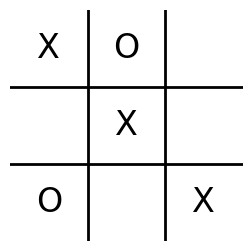

Player 1 has won!
Play again? (Yes or No): Yes
Player1: Choose X or O: 0
Player 2 will go first
Ready to play? y or n: n
Play again? (Yes or No): Yes
Player1: Choose X or O: X
Player 2 will go first
Ready to play? y or n: n
Play again? (Yes or No): No


In [105]:
print('Welcome to Tic Tac Toe!')

while True:
    # Setup the game
    the_board = [' '] * 10  # Initialize the board
    player1_marker, player2_marker = player_input()  # Get player markers
    turn = choose_first()  # Randomly decide who goes first
    print(f'{turn} will go first')

    game_on = input('Ready to play? y or n: ').lower().startswith('y')

    while game_on:
        # Display the board
        display_board(the_board)

        # Player's turn (common logic for both players)
        position = player_choice(the_board)
        marker = player1_marker if turn == 'Player 1' else player2_marker
        place_marker(the_board, marker, position)

        # Check for win or tie
        if win_check(the_board, marker):
            display_board(the_board)
            print(f'{turn} has won!')
            game_on = False
        elif full_board_check(the_board):
            display_board(the_board)
            print('Tie game!')
            game_on = False
        else:
            # Switch turns
            turn = 'Player 2' if turn == 'Player 1' else 'Player 1'

    if not replay():
        break